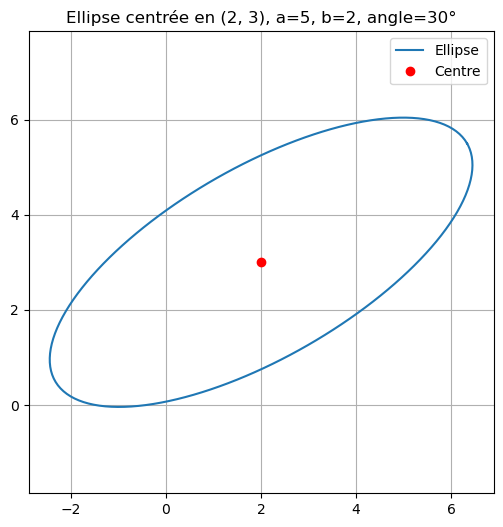

In [1]:
#Chapitre 6 Exo1:

import numpy as np
import matplotlib.pyplot as plt

def tracer_ellipse(xc, yc, a, b, angle_deg):
    """
    Trace une ellipse centrée en (xc, yc) avec demi-axes a et b,
    et une rotation d'angle_deg degrés (sens trigonométrique).
    """
    angle_rad = np.deg2rad(angle_deg)
    
    # Paramètre t pour parcourir l'ellipse
    t = np.linspace(0, 2*np.pi, 300)
    
    # Coordonnées ellipse sans rotation centrée à l'origine
    x = a * np.cos(t)
    y = b * np.sin(t)
    
    # Matrice de rotation
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                  [np.sin(angle_rad),  np.cos(angle_rad)]])
    
    # Appliquer la rotation
    xy_rot = R @ np.array([x, y])
    
    # Décaler vers le centre (xc, yc)
    x_rot = xy_rot[0, :] + xc
    y_rot = xy_rot[1, :] + yc
    
    # Tracer l'ellipse
    plt.figure(figsize=(6,6))
    plt.plot(x_rot, y_rot, label='Ellipse')
    plt.plot(xc, yc, 'ro', label='Centre')
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.title(f'Ellipse centrée en ({xc}, {yc}), a={a}, b={b}, angle={angle_deg}°')
    plt.show()

# Exemple d'utilisation
tracer_ellipse(2, 3, 5, 2, 30)


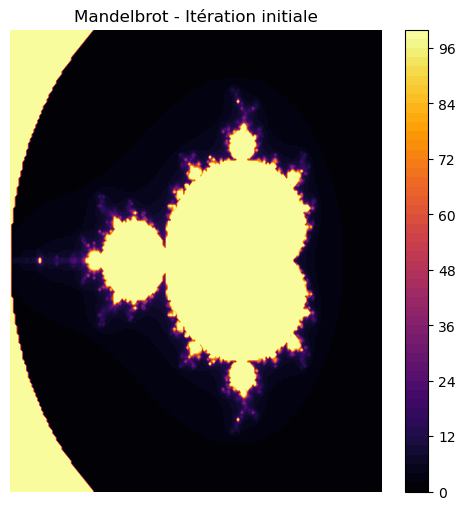

In [2]:

#Chapitre 6 Exo2:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    """ Génère une image du Mandelbrot (nombre d’itérations avant divergence) """
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    c = x[:, np.newaxis] + 1j * y[np.newaxis, :]
    z = np.zeros_like(c)
    div_time = np.zeros(c.shape, dtype=int)

    mask = np.ones(c.shape, dtype=bool)
    for i in range(max_iter):
        z[mask] = z[mask] ** 2 + c[mask]
        mask_new = (np.abs(z) <= 2)
        div_time[mask & (~mask_new)] = i
        mask = mask_new
    div_time[div_time == 0] = max_iter
    return div_time.T  # Transposer pour correspondre aux axes matplotlib

def moyenne_voisins(arr):
    """ Remplace chaque élément par la moyenne de ses 8 voisins (sans modifier les bords) """
    new_arr = arr.copy()
    rows, cols = arr.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            voisins = arr[i-1:i+2, j-1:j+2]
            new_arr[i, j] = np.mean(voisins)
    return new_arr

# Paramètres Mandelbrot
xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
width, height = 200, 200
max_iter = 100

# Générer l'image Mandelbrot initiale
mandelbrot = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

fig, ax = plt.subplots(figsize=(6,6))
contour = ax.contourf(mandelbrot, levels=50, cmap='inferno')
plt.colorbar(contour)
ax.set_title("Mandelbrot - Itération initiale")
ax.axis('off')

def update(frame):
    global mandelbrot, contour
    mandelbrot = moyenne_voisins(mandelbrot)
    ax.clear()
    contour = ax.contourf(mandelbrot, levels=50, cmap='inferno')
    ax.set_title(f"Évolution - Itération {frame}")
    ax.axis('off')

ani = FuncAnimation(fig, update, frames=50, interval=100)
plt.show()


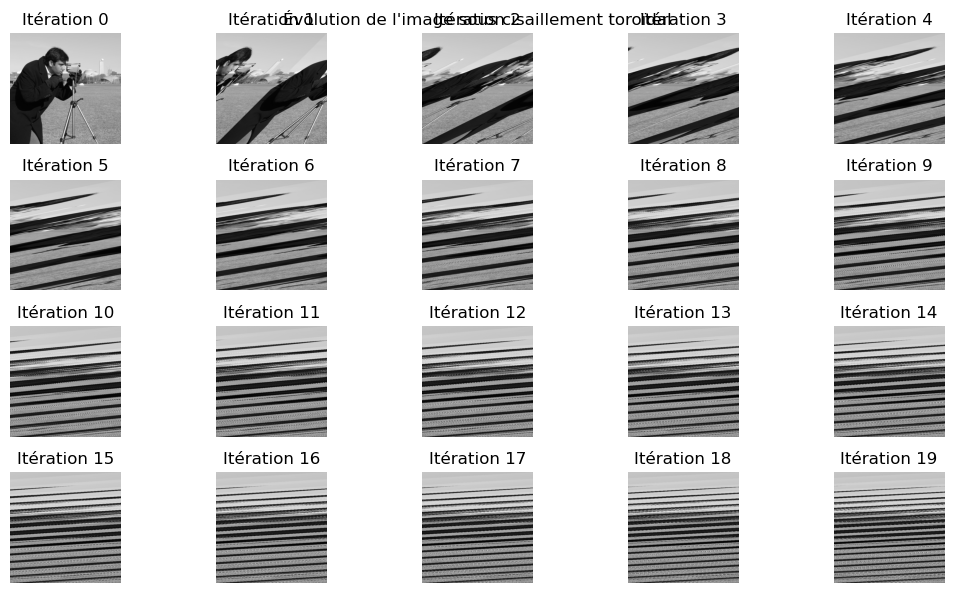

In [9]:
#Chapitre 6 Exo3 :

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import os

# Charger une image 512x512 en niveaux de gris (ici camera image)
I = data.camera()
# I = data.astronaut() # couleur, mais on prendra niveaux de gris

h, w = I.shape

# Paramètres du cisaillement
shear_x = 1  # cisaillement horizontal
shear_y = 0  # pas de cisaillement vertical pour simplifier

def toroidal_shear(image, shear_x=1, shear_y=0):
    """
    Applique un cisaillement toroïdal à l'image en décalant selon shear_x, shear_y,
    avec réinjection modulo.
    """
    h, w = image.shape
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))

    # Exemple de mapping:
    # x' = (x + shear_x * y) % w
    # y' = (y + shear_y * x) % h

    x_new = (x_indices + shear_x * y_indices) % w
    y_new = (y_indices + shear_y * x_indices) % h

    # Utilisation de l'indexation avancée
    result = image[y_new, x_new]

    return result

# Créer dossier pour sauvegarder images
output_dir = "shear_images"
os.makedirs(output_dir, exist_ok=True)

# Nombre d'itérations à sauvegarder
n_steps = 20

img = I.copy()

plt.figure(figsize=(12, 6))
for i in range(n_steps):
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Itération {i}')
    plt.axis('off')
    plt.tight_layout()
    
    # Sauvegarder image
    plt.imsave(f"{output_dir}/shear_{i:02d}.png", img, cmap='gray')
    
    # Appliquer la transformation toroïdale
    img = toroidal_shear(img, shear_x=shear_x, shear_y=shear_y)

plt.suptitle("Évolution de l'image sous cisaillement toroïdal")
plt.show()


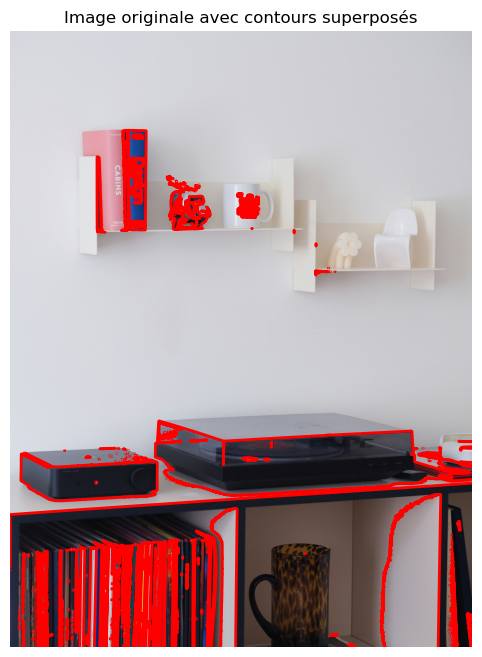

In [12]:
# Chapitre 6 Exo4 :

import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# Lire une image depuis un fichier (exemple : 'image.jpg')
# Remplace 'image.jpg' par le chemin de ton image locale
image_path = 'image.jpg'
im = imageio.imread(image_path)

# Si l'image est en couleur (3 canaux), on calcule la moyenne pour avoir du gris
if im.ndim == 3:
    im_gray = np.mean(im, axis=2)
else:
    im_gray = im  # déjà en niveaux de gris

# Choisir un niveau de gris pour le contour (entre min et max de im_gray)
level = (np.max(im_gray) + np.min(im_gray)) / 2  # milieu

# Tracer l'image originale
plt.figure(figsize=(8, 8))
plt.imshow(im)
plt.title("Image originale avec contours superposés")

# Tracer les contours sur l'image
contours = plt.contour(im_gray, levels=[level], colors='red', linewidths=2)

plt.axis('off')
plt.show()


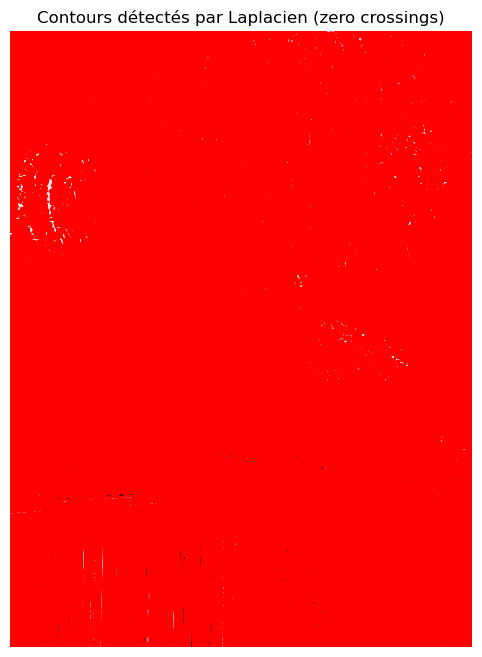

In [1]:
#Chapitre 6 Exo 5 :

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from scipy import ndimage

# Charger une image (remplacer par un chemin valide)
image_path = 'image.jpg'
im = imageio.imread(image_path)

# Conversion en niveaux de gris
if im.ndim == 3:
    im_gray = np.mean(im, axis=2)
else:
    im_gray = im

# Calcul du Laplacien gaussien
laplacian = ndimage.gaussian_laplace(im_gray, sigma=2)

# Détection vectorisée des zero crossings
def zero_crossings(arr):
    # Calcule les différences de signe entre chaque pixel et ses voisins horizontaux et verticaux
    zx = np.zeros(arr.shape, dtype=bool)
    zx[:-1, :] = (arr[:-1, :] * arr[1:, :]) < 0
    zy = np.zeros(arr.shape, dtype=bool)
    zy[:, :-1] = (arr[:, :-1] * arr[:, 1:]) < 0
    return zx | zy

edges = zero_crossings(laplacian)

# Affichage
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray' if im.ndim == 2 else None)
plt.title("Contours détectés par Laplacien (zero crossings)")

# Superposer les contours détectés en rouge semi-transparent
plt.contour(edges, colors='red', linewidths=1)

plt.axis('off')
plt.show()


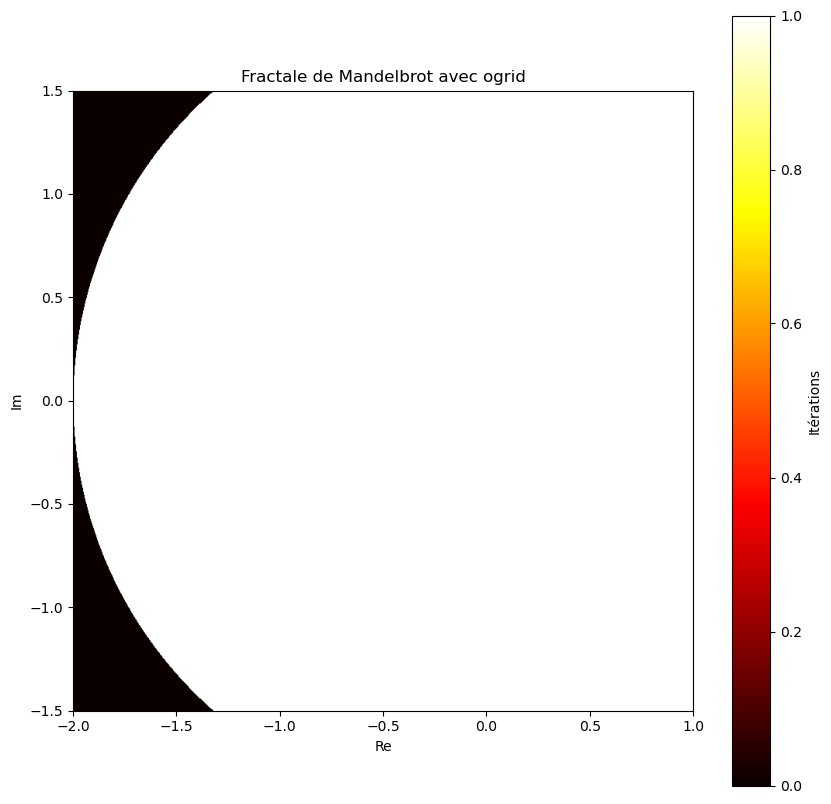

In [2]:
# Chapitre 6 Exo 6 :

import numpy as np
import matplotlib.pyplot as plt

# Taille de l'image
width, height = 800, 800

# Définir les limites de l'ensemble de Mandelbrot
re_min, re_max = -2.0, 1.0
im_min, im_max = -1.5, 1.5

# Créer une grille 2D de points complexes avec ogrid (grille creuse)
y, x = np.ogrid[im_min:im_max:height*1j, re_min:re_max:width*1j]
c = x + 1j * y

# Initialiser z et l'itération
z = np.zeros_like(c)
mandelbrot = np.zeros(c.shape, dtype=int)
max_iter = 200

for i in range(max_iter):
    mask = np.abs(z) <= 2
    z[mask] = z[mask]**2 + c[mask]
    mandelbrot[mask & (mandelbrot == 0)] = i

# Affichage du résultat
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot, extent=[re_min, re_max, im_min, im_max], cmap='hot')
plt.colorbar(label='Itérations')
plt.title("Fractale de Mandelbrot avec ogrid")
plt.xlabel("Re")
plt.ylabel("Im")
plt.show()


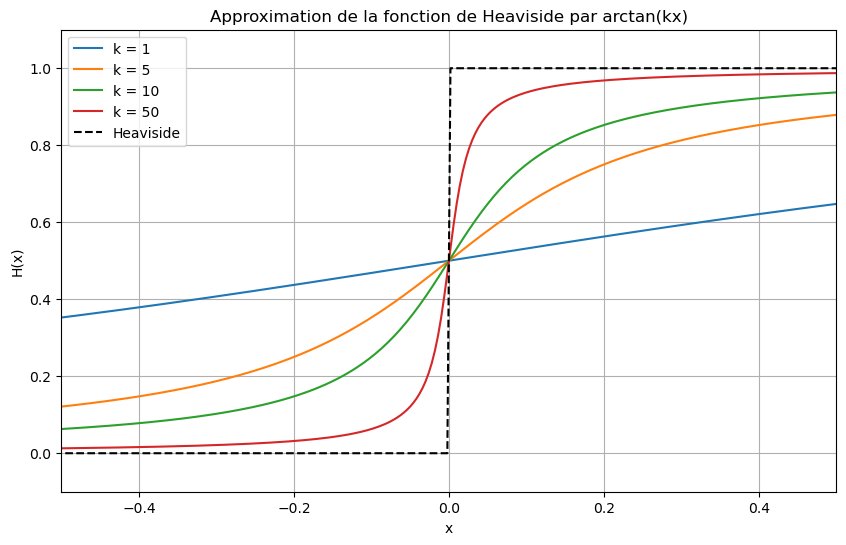

In [3]:
# Chapitre 6 Exo7 :
import numpy as np
import matplotlib.pyplot as plt

# Définir les x autour de 0
x = np.linspace(-2, 2, 1000)

# Valeurs de k pour différents niveaux de transition
k_values = [1, 5, 10, 50]

# Tracer toutes les approximations
plt.figure(figsize=(10, 6))

for k in k_values:
    H_approx = 0.5 + (1/np.pi) * np.arctan(k * x)
    plt.plot(x, H_approx, label=f'k = {k}')

# Ajouter la vraie fonction de Heaviside (pour comparaison)
H_exact = np.heaviside(x, 1)
plt.plot(x, H_exact, 'k--', label='Heaviside', linewidth=1.5)

# Zoom autour de 0
plt.xlim(-0.5, 0.5)
plt.ylim(-0.1, 1.1)

# Mise en forme du graphique
plt.title("Approximation de la fonction de Heaviside par arctan(kx)")
plt.xlabel("x")
plt.ylabel("H(x)")
plt.legend()
plt.grid(True)
plt.show()
